In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
df=pd.DataFrame(iris.data,columns=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])

In [5]:
df.insert(4, "target",iris.target, True)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


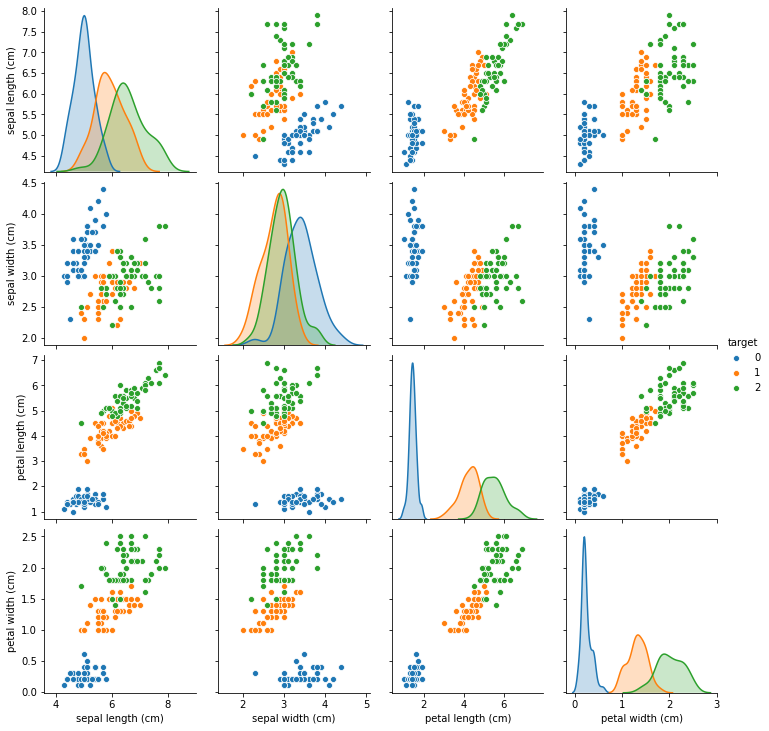

In [9]:
sns.pairplot(df,hue='target')

# For simplicity and to use use Logistic classifier as a binary clasifier, I would be taking only two class.

By looking at the pair plot if I drop target 1, we will get better results.

In [10]:
df=df[df['target'] != 1]

In [11]:
df['target'].value_counts()

2    50
0    50
Name: target, dtype: int64

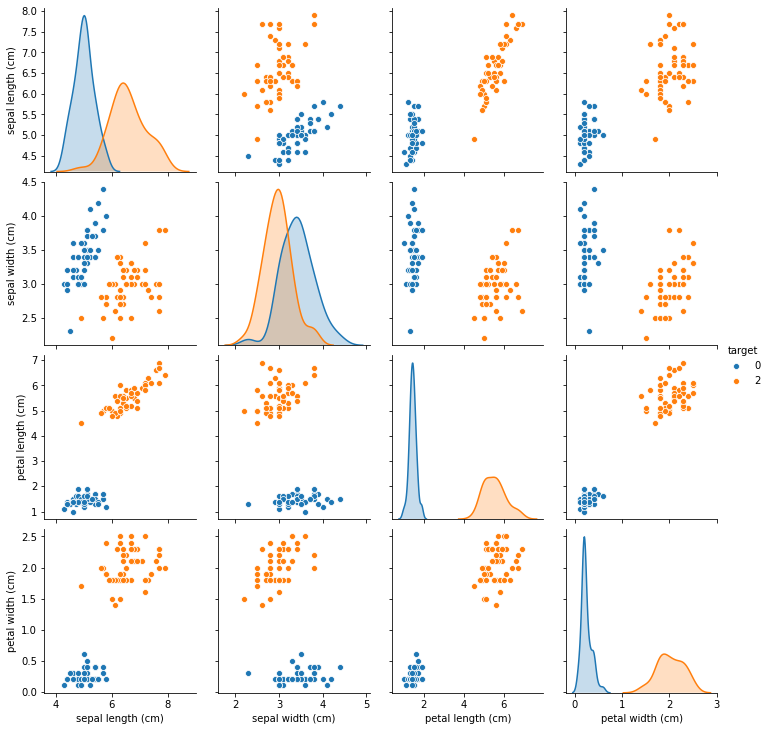

In [12]:
sns.pairplot(df,hue='target')

In [13]:
X=df.drop('target',axis=1)
y=df['target']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Creating Model

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [18]:
predictions=lr.predict(X_test)

In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [22]:
new_flower

sepal length (cm)    4.9
sepal width (cm)     3.0
petal length (cm)    1.4
petal width (cm)     0.2
Name: 1, dtype: float64

In [21]:
new_flower= df.drop('target',axis=1).iloc[1]

In [25]:
lr.predict(new_flower.values.reshape(1,4))

array([0])

In [26]:
df.iloc[1]['target']

0.0

In [27]:
new_flower= df.drop('target',axis=1).iloc[5]

In [28]:
lr.predict(new_flower.values.reshape(1,4))

array([0])

In [29]:
df.iloc[5]['target']

0.0